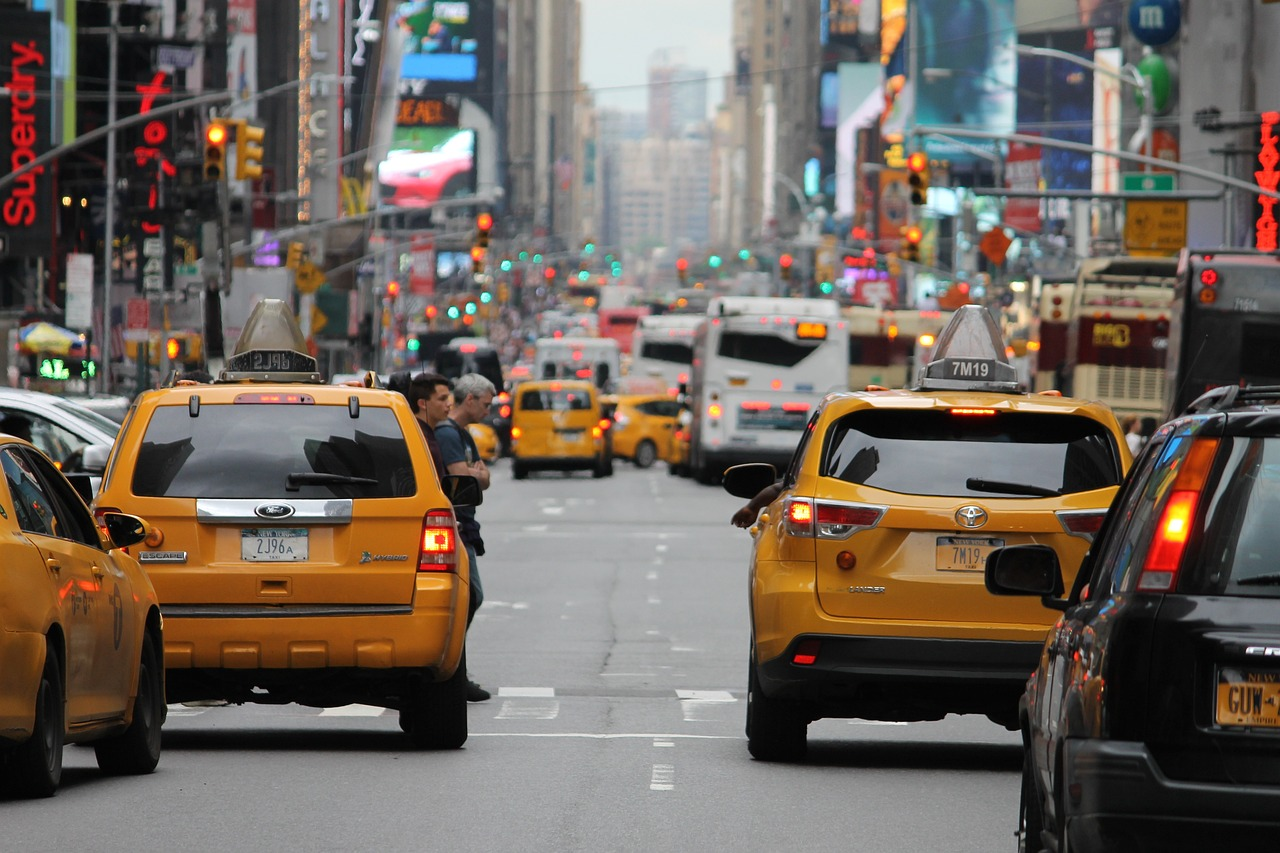

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

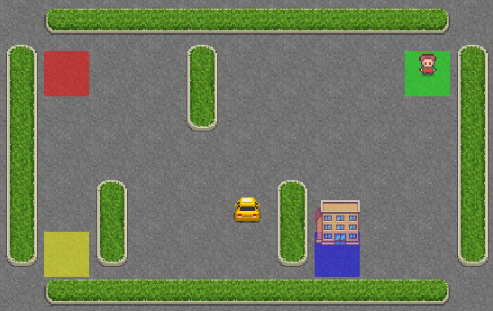

In [1]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 93.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 75.1 MB/s eta 0:00:00


In [2]:
# Start coding here
# Feel free to add as many cells as you want
num_states = env.observation_space.n
num_actions = env.action_space.n

# table to store the Q values
q_table = np.zeros((num_states, num_actions))

gamma = 1 #reduction rate
alpha = 0.1 #learning rate

# update Q values using Q-learning method
def update_q_table(state, action, reward, new_state):
    old_value = q_table[state, action]
    next_max = max(q_table[new_state])
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)


In [3]:
# function to get the final updated policy after updating the Q values
def get_policy():
    policy = {state: np.argmax(q_table[state]) for state in range(num_states)}
    return policy


In [4]:
num_episodes = 2000
episode_returns = []
frames = []
epsilon = 0.9

# using the epsilon greedy method to balance exploration and exploitation
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        action = env.action_space.sample() # Explore
    else:
        action = np.argmax(q_table[state, :]) # Exploit
    return action

In [5]:
for episode in range(num_episodes):
    state, info = env.reset(seed = 42)
    terminated = False
    episode_total_reward = 0
    ct = 0
    while ((not terminated) and (ct < 100)):
        ct = ct + 1
        # Random action selection
        action = epsilon_greedy(state)
        # Take action and observe new state and reward
        new_state, reward, terminated, truncated, info = env.step(action)
        # Update Q-table
        update_q_table(state, action, reward, new_state)
        episode_total_reward += reward
        state = new_state
    episode_returns.append(episode_total_reward)
frames.append(env.render())
policy = get_policy()

In [6]:
policy

{0: 0,
 1: 0,
 2: 4,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 3,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 3,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 1,
 43: 0,
 44: 0,
 45: 0,
 46: 2,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 2,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 2,
 75: 0,
 76: 0,
 77: 0,
 78: 3,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 4,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 3,
 99: 0,
 100: 0,
 101: 0,
 102: 1,
 103: 0,
 104: 0,
 105: 0,
 106: 2,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 1,
 12

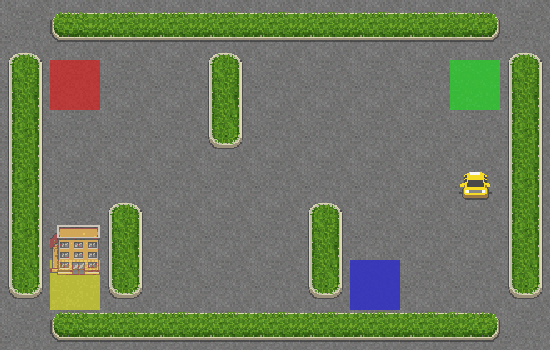

In [3]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 